# 134B Week 3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Exercise 3.2
Suppose that you short the S&R index for $1000 and sell a 1000-strike put. Construct
a table mimicking Table 3.1 that summarizes the payoff and profit of this position.

(We assumed an index price of $1000, a 2% effective 6-month interest rate,
and premiums of $93.809 for the 1000-strike 6-month call and $74.201 for the 1000-strike
6-month put.)

| S&R Index | S&R Put | Payoff | -(Cost + Interest) | Profit |
|-----------|---------|--------|--------------------|--------|
| $900      | $100    | $1000  | -$1095.68         | -$95.68|
| $950      | $50     | $1000  | -$1095.68         | -$95.68|
| $1000     | $0      | $1000  | -$1095.68         | -$95.68|
| $1050     | $0      | $1050  | -$1095.68         | -$45.68|
| $1100     | $0      | $1100  | -$1095.68         | $4.32  |
| $1150     | $0      | $1150  | -$1095.68         | $54.32 |
| $1200     | $0      | $1200  | -$1095.68         | $104.32|

Payoff and profit at expiration from purchasing the S&R
index and a 1000-strike put option.

### Solution:
Note that we short sell S&R index for \$1000 and sell a \$74.201 put option initially. Then we will get:

In [13]:
print(f'At expiration, the -(cost+interest) of the option is ${(1000+74.201)*(1+0.02):.2f}')

At expiration, the -(cost+interest) of the option is $1095.69


At expiration, since we are short selling, we need to buy it back, so:
$$\text{S\&R index} = -S_T$$
$$\text{S\&R put} = -max(0, 1000-S_T)$$

So we have the following table.

In [14]:
data = {
    "S&R Index": [-900.00, -950.00, -1000.00, -1050.00, -1100.00, -1150.00, -1200.00],
    "S&R Put": [-100.00, -50.00, 0.00, 0.00, 0.00, 0.00, 0.00],
    "Payoff": [-1000.00, -1000.00, -1000.00, -1050.00, -1100.00, -1150.00, -1200.00],
    "-(Cost + Interest)": [1095.69] * 7,
    "Profit": [95.69, 95.69, 95.69, 45.69, -4.31, -54.31, -104.31]
}

df = pd.DataFrame(data)
df

,S&R Index,S&R Put,Payoff,-(Cost + Interest),Profit
0,-900.0,-100.0,-1000.0,1095.69,95.69
1,-950.0,-50.0,-1000.0,1095.69,95.69
2,-1000.0,0.0,-1000.0,1095.69,95.69
3,-1050.0,0.0,-1050.0,1095.69,45.69
4,-1100.0,0.0,-1100.0,1095.69,-4.31
5,-1150.0,0.0,-1150.0,1095.69,-54.31
6,-1200.0,0.0,-1200.0,1095.69,-104.31


## Note
**For the following problems assume the effective 6-month interest rate is 2%, the S&R 6-
month forward price is $1020, and use these premiums for S&R options with 6 months to
expiration:**

| Strike | Call Price | Put Price |
|:------:|-----------:|----------:|
| $950   | $120.405   | $51.777   |
| $1000  | $93.809    | $74.201   |
| $1020  | $84.470    | $84.470   |
| $1050  | $71.802    | $101.214  |
| $1107  | $51.873    | $137.167  |

## Exercise 3.4
Suppose you short the S&R index for $1000 and buy a 950-strike call. Construct
payoff and profit diagrams for this position. Verify that you obtain the same payoff
and profit diagram by borrowing $931.37 and buying a 950-strike put.

### Solution:
At the expiration, suppose the S&R index is $S_T$. Then the payoff of the call option:
$$ - min(950, S_T)$$
This is because at the expiration, we have the rigth to buy the stock at \$950. When $S_T$ is larger than \$950, we choose to exercise; otherwise, not.

Thus, the overall profit is:
$$(1000 - 120.405)\times(1+r) - min(950, S_T) $$

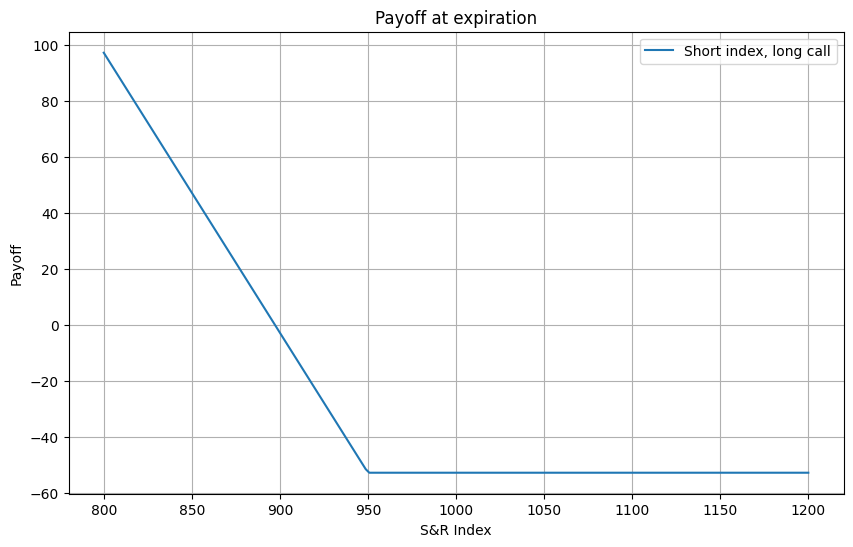

In [15]:
# Plot
r = 0.02
call = 120.405
strike = 950
short = 1000
x = np.linspace(800, 1200, 200)

plt.figure(figsize=(10, 6))
plt.plot(x, (short - call)*(1+r) - np.minimum(strike, x), label = 'Short index, long call')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()


## Exercise 3.6
Verify that you earn the same profit and payoff by (a) buying the S&R index for
$1000 and (b) buying a 950-strike S&R call, selling a 950-strike S&R put, and
lending $931.37.

### Solution:
- (a): The payoff is:
$$ S_T - 1000\times(1+r) $$
- (b): For buying a call and selling a put, you will receive:
$$ max(S_T-950, 0) - max(0,950-S_T) = S_T - 950$$
At the expiration, you will receive:
$$931.37 \times(1+r) = 950 $$
Thus, you will receive in total: $S_T$.
Note you will have to do this step to make sure you can exercise the call option at expiration.

However, for the profit:
$$ S_T - 950 - (120.405 - 51.777)\times(1+r)$$

In [17]:
r = 0.02
print(f'For (a) the cost is ${1000*(1+r):.2f}')
print(f'For (b) the cost is ${950 + (120.405-51.777)*(1+r):.2f}')

For (a) the cost is $1020.00
For (b) the cost is $1020.00


## Exercise 3.8
Suppose the premium on a 6-month S&R call is $109.20 and the premium on a put
with the same strike price is $60.18. What is the strike price?

### Solution:
We will use the Put-Call-Parity:
Note we have:
$$\text{Call}(K,t) - \text{Put}(K,t) = PV(F_{0,T}-K)$$
Where $K$ is the strike price, $F_{0,T}$ is the forward price.

Then, we can get, since $PV(F_{0,T}) = F_{0,T}/(1+r) = 1000$, we have:
$$ PV(K) = 1000 - (\text{Call}(K,t) - \text{Put}(K,t))$$

In [18]:
r = 0.02
call = 109.2
put = 60.18
print(f"The strike price is ${(1000 - call + put)*(1+r):.2f}")

The strike price is $970.00


## Exercise 3.10
Construct payoff and profit diagrams for the purchase of a 1050-strike S&R call and
sale of a 950-strike S&R call. Verify that you obtain exactly the same profit diagram
for the purchase of a 1050-strike S&R put and sale of a 950-strike S&R put. What
is the difference in the initial cost of these positions?

### Solution:
We will draw the diagram:

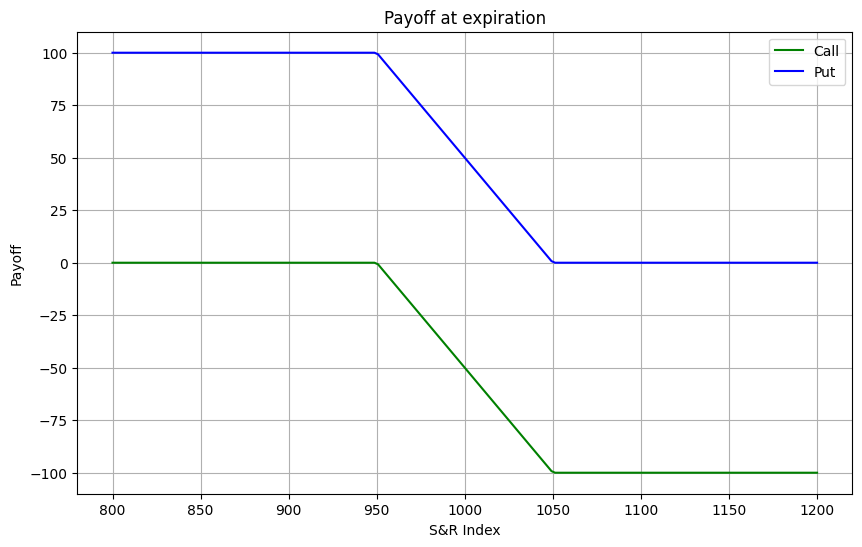

In [33]:
x = np.linspace(800, 1200, 200)
call1050 = np.maximum(0, x - 1050)
call950 = np.maximum(0, x - 950)

put1050 = np.maximum(0, 1050 - x)
put950 = np.maximum(0, 950 - x)

plt.figure(figsize=(10, 6))
plt.plot(x, call1050- call950,color = 'green', label = 'Call')
plt.plot(x, -put950+put1050 ,color = 'blue', label = 'Put')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

With the cost:

In [34]:
callcost = (-71.802 + 120.405)*(1+r)
print(f'The cost of the call is ${callcost:.2f}')
putcost = (-101.214 + 51.777)*(1+r)
print(f'The cost of the put is ${putcost:.2f}')

The cost of the call is $49.58
The cost of the put is $-50.43


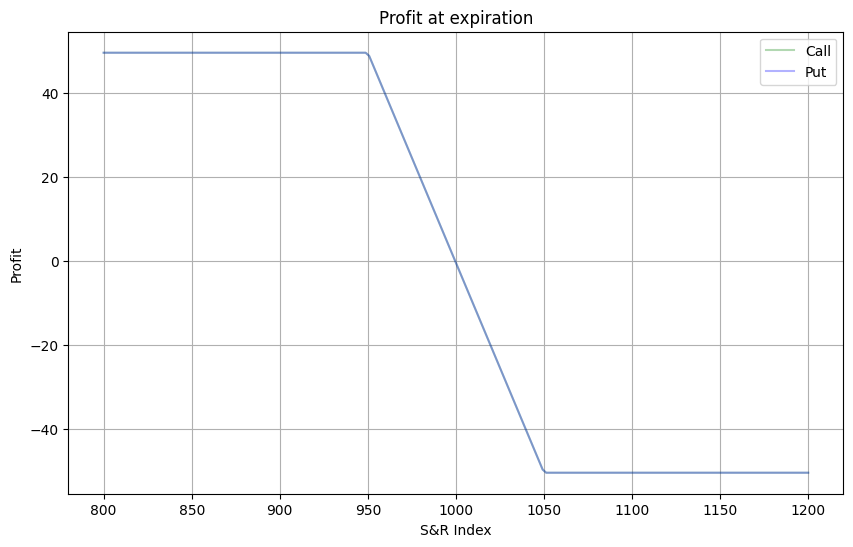

In [36]:
# Plot them again
plt.figure(figsize=(10, 6))
plt.plot(x, call1050- call950 + callcost,color = 'green', label = 'Call', alpha = 0.3)
plt.plot(x, put1050 - put950 + putcost,color = 'blue', label = 'Put', alpha = 0.3)
plt.xlabel('S&R Index')
plt.ylabel('Profit')

plt.title('Profit at expiration')
plt.legend()
plt.grid()

plt.show()

## Exercise 3.12
Suppose you invest in theS&Rindex for $1000, buy a 950-strike put, and sell a 1107-
strike call. Draw a profit diagram for this position. How close is this to a zero-cost
collar?

### Solution:
Let's draw the diagram:

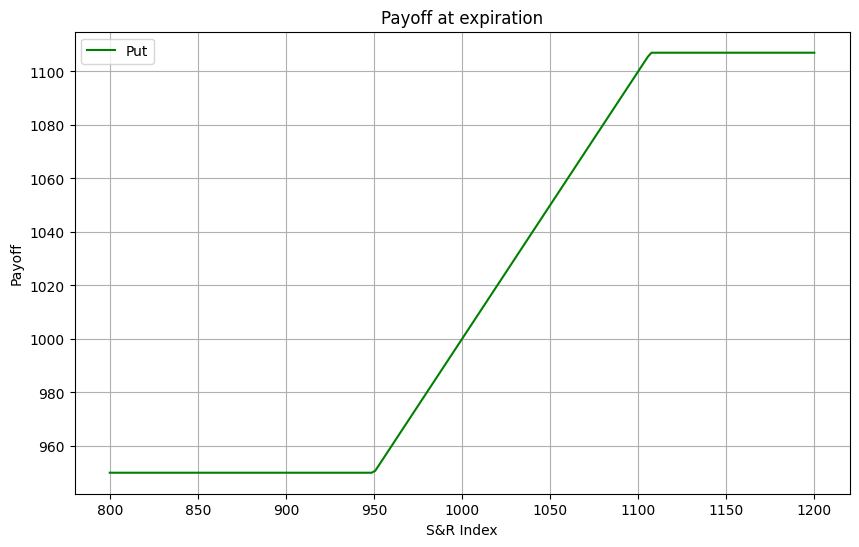

In [37]:
x = np.linspace(800, 1200, 200)
put950 = np.maximum(0, 950 - x)
call1107 = np.maximum(0, x - 1107)

plt.figure(figsize=(10, 6))
plt.plot(x, x+put950 - call1107,color = 'green', label = 'Put')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

In [31]:
print(f'The net premium is ${-51.873+51.777:.3f}')

The net premium is $-0.096


Which is very close to be a zero collar.

## Exercise 3.14
Suppose you buy a 950-strike S&R call, sell a 1000-strike S&R call, sell a 950-strike
S&R put, and buy a 1000-strike S&R put.
- a. Verify that there is no S&R price risk in this transaction.
- b. What is the initial cost of the position?
- c. What is the value of the position after 6 months?
- d. Verify that the implicit interest rate in these cash flows is 2% over 6 months

### Solution:
- (a): There are three intervals:
  - (1) $S_T < 950$: Then we have short 950-put and long 1000 put, we have net profit $(S_T - 950 + 1000 - S_T) = 50$
  - (2) $950 < S_T < 1000$: Then we have long 950-call and long 1000 put, we have net profit $(S_T - 950 + 1000 - S_T) = 50$
  - (3) $S_T > 1000$: Then we have long 950-call and short 1000 call, we have net profit $(S_T - 950 + 1000 - S_T) = 50$

- (b): The initial cost:
$$\$120.405 − \$93.809 − \$51.77 + \$74.201 = \$49.027$$
- (c): After 6 mounths, we have:

In [31]:
print(f'After 6 mounths, the value of the put is ${49.027*(1+0.02):.3f}')

After 6 mounths, the value of the put is $50.008


- (d): The implicit interest rate is:
$$ return / cost$$

In [38]:
print(f'The implicit interest rate is {(-(49.027-50.008)/49.027)*100:.3f}%')

The implicit interest rate is 2.001%


## Exercise 3.17
Construct an asymmetric butterfly using the 950-, 1020-, and 1050-strike options.
How many of each option do you hold? Draw a profit diagram for the position.

### Solution:

The right ratio is given by:
$$ \lambda = \frac{K_3-K_2}{K_3-K_1} = \frac{1050-1020}{1050-950} = 0.3$$

In order to construct the asymmetric butterfly, for every 1,020-strike call we write, we buy λ
950-strike calls and 1 − λ 1,050-strike calls. Since we can only buy whole units of calls, we will
in this example buy three 950-strike and seven 1,050-strike calls, and sell ten 1,020-strike calls.

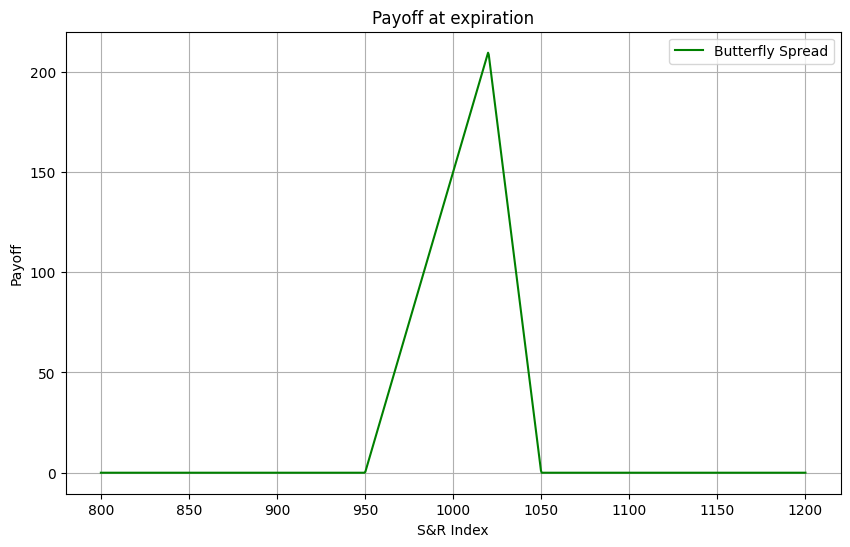

In [39]:
x = np.linspace(800, 1200, 1000)

call950 = np.maximum(0, x-950)
call1020 = np.maximum(0, x-1020)
call1050 = np.maximum(0, x-1050)

plt.figure(figsize=(10, 6))
plt.plot(x, 3*call950 + 7*call1050 - 10*call1020,color = 'green', label = 'Butterfly Spread')
plt.xlabel('S&R Index')
plt.ylabel('Payoff')
plt.title('Payoff at expiration')
plt.legend()
plt.grid()

plt.show()

## Exercise 3.18
Verify that the butterfly spread in Figure 3.14 can be duplicated by the following
transactions (use the option prices in Table 3.4):
- a. Buy 35 call, sell two 40 calls, buy 45 call.
- b. Buy 35 put, sell two 40 puts, buy 45 put.
- c. Buy stock, buy 35 put, sell two 40 calls, buy 45 call.

![table](../img/134B_Week4_2.png "Title")

![table](../img/134B_Week4_3.png "Title")

### Solution:
We draw the graph:

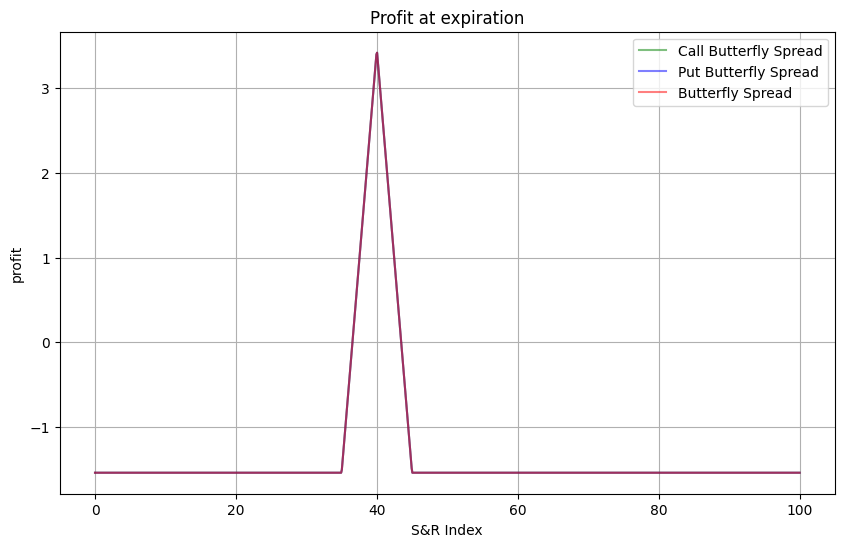

In [42]:
x = np.linspace(0, 100, 1000)
call35 = np.maximum(0, x-35) - 6.13
call40 = np.maximum(0, x-40) - 2.78
call45 = np.maximum(0, x-45) - 0.97

put35 = np.maximum(0, 35-x) - 0.44
put40 = np.maximum(0, 40-x) - 1.99
put45 = np.maximum(0, 45-x) - 5.08

plt.figure(figsize=(10, 6))
plt.plot(x, call35 - 2*call40 + call45,color = 'green', label = 'Call Butterfly Spread', alpha = 0.5)
plt.plot(x, put35 - 2*put40 + put45,color = 'blue', label = 'Put Butterfly Spread', alpha = 0.5)
plt.plot(x, x + put35 - 2*call40 + call45 - 35 - 6.13 + 0.44,color = 'red', label = 'Butterfly Spread', alpha = 0.5)
plt.xlabel('S&R Index')
plt.ylabel('profit')
plt.title('Profit at expiration')
plt.legend()
plt.grid()

plt.show()

## Exercise 3.19
Here is a quote from an investment website about an investment strategy using
options:
One strategy investors are applying to the XYZ options is using “synthetic
stock.”Asynthetic stock is created when an investor simultaneously purchases
a call option and sells a put option on the same stock. The end result is that the
synthetic stock has the same value, in terms of capital gain potential, as the
underlying stock itself. Provided the premiums on the options are the same,
they cancel each other out so the transaction fees are a wash.
Suppose, to be concrete, that the premium on the call you buy is the same as the
premium on the put you sell, and both have the same strikes and times to expiration.
- a. What can you say about the strike price?
- b. What term best describes the position you have created?
- c. Suppose the options have a bid-ask spread. If you are creating a synthetic
purchased stock and the net premium is zero inclusive of the bid-ask spread,
where will the strike price be relative to the forward price?
- d. If you create a synthetic short stock with zero premium inclusive of the bid-ask
spread, where will the strike price be relative to the forward price?
- e. Do you consider the “transaction fees” to really be “a wash”? Why or why
not?

### Solution:
- (a): We know from the Put-Call-Parity that if we buy a call and sell a put that are at the money
(i.e., S(0) = K), then the call option is slightly more expensive than the put option, the
difference being the value of the stock minus the present value of the strike. Therefore, we
can tell that the strike price must be a bit higher than the current stock price, and more
precisely, it should be equal to the forward price.

- (b): We sold a collar with no difference in strike prices. The profit diagram will be a straight line,
which means that we effectively created a long forward contract.

- (c): Remember that you are buying at the ask and selling at the bid, and that the bid price is
always smaller than the ask. Suppose we had established a zero-cost synthetic at the forward
price, and now we introduce the bid-ask spread. This means that we have to pay a little more
for the call and receive a little less for the put. We are paying money for the position, and in
order to correct it, we must make the put a bit more attractive, and the call less attractive. We
do so by shifting the strike price to the right of the forward: Now the buyer of the call must
wait a little bit longer before his call pays off, and he is only willing to buy it for less. As the
opposite is true for the put, we have established that the strike must be to the right of the
forward.

- (d): If we are creating a synthetic short stock, we buy the put option and sell the call option. We
are buying at the ask and selling at the bid, and the bid price is always smaller than the ask.
Suppose we had established a zero-cost synthetic short at the forward price, and now we
introduce the bid-ask spread. This means that we have to pay a little more for the put, and
receive a little less for the call. We are paying money for the position, and in order to correct it, we must make the call a bit more attractive. The call gets more attractive if the strike price
decreases because the final payoff is max(S − K, 0). Therefore, we have to shift the strike
price to the left of the forward price.

- (e): No, transaction fees are not a wash because we are paying implicitly the bid-ask spread: If
we bought a stock today and held it until the expiration of the options, we would get the
future stock price less the forward price (which is equivalent to the loan we got to finance the
stock purchase). Now, we established in (c) that the strike price is to the right of the forward
price. Therefore, we will receive from the collar of part (c) that the stock price less something
that is larger than the forward price: We make a loss compared to the self-financed outright
purchase of the stock. These considerations do not yet take into account that we incur
transaction costs on two instruments, compared to only one time brokerage fees if we buy the
stock directly.
It is thus very important to be aware of transaction costs when comparing different
investment strategies